<a href="https://colab.research.google.com/github/martinvelezf/VIUActividades/blob/main/Martin_Velez_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Martín Vélez  <br>
Url: https://colab.research.google.com/drive/11o3Hi3OfvQUVeBURRYtYk0ru9Fd51XhU?usp=sharing<br>

Asignatura: Algoritmos de Optimización

Problema:

>3. Combinar cifras y operaciones

Descripción del problema:
*   El problema consiste en analizar el siguiente problema 
*   Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/)
* Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada. Un ejemplo sería para obtener el 4:
</br>
4+2-6/3*1 = 4

</br>




                                        

<h2>¿Cuantas posibilidades hay sin tener en cuenta las restricciones?</h2>

<h4>Respuesta </h4>
Sin tomar en cuenta cuantos numeros dse deben tomar o si el intervalo de numeros es abierto la psobilidades son infinitas/ Sin embargo tomando un intervalo como los plantea el ejercicio de digitos del 1 al 9, y cuatro operaciones. Se puede calcular sin tomar las restricciones de que los numero son 
Sin tomar encuenta la repeticion, se debe tomar 5 numeros
$9^5=59049$ y cuatro signos $4^4=256$, en total son 59049 combinaciones

<h2> ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones? </h2>


<h4>Respuesta </h4>
Como los numeros no se deben repetir, tenemos una permutacion de 9!
$9*8*7*6*5=15120$
y 4! para los signos
$4*3*2*1=24$
En total tenemos 
$15120*24=362880$ de combinaciones.

Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Respuesta
(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>
Sin tomar encuenta la repeticion, se debe tomar 5 numeros
$9^5=59049$ y cuatro signos $4^4=256$, en total son 59049 combinaciones
</br>
</br>
¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.
Como los numeros no se deben repetir, tenemos una permutacion de 9!
$9*8*7*6*5=15120$
y 4! para los signos
$4*3*2*1=24$
En total tenemos 
$15120*24=362880$ de combinaciones.

Según el modelo para el espacio de soluciones<br>
<br>
<h3>¿Cual es la función objetivo?</h2>
<h4>Respuesta</h4>
Dado un $n \in \mathbb{R}$, encontrar la combinacion de 4 operadores ($op_1,op_2,op_3,op_4$) que pueden ser (+,-,/,*) y de 5 numeros que son digitos del 1 al 9,$(n_1,n_2,n_3,n_4,n_5)$ que sean igual al n

$n_1(op_1)n_2(op_2)n_3(op_3)n_4(op_4)n_5 = n$
$n_1(op_1)n_2(op_2)n_3(op_3)n_4(op_4)n_5 -n=0$

Restringido a que $op_1 \not\equiv op_2 \not\equiv op_3 \not\equiv op_4$ y $n_1\not\equiv n_2 \not\equiv n_3 \not\equiv n_4 \not\equiv n_5$
<br><br>

<h3>¿Es un problema de maximización o minimización?</h3>
<h4>Respuesta</h4>
Ninguno, es un problema de búsqueda, aunque se prodia escribir como maximación en el caso que se aceptará soluciones cercana, que cumpliría la siguiente condición $max (\frac{1}{n - n_1(op_1)n_2(op_2)n_3(op_3)n_4(op_4)n_5}  )$

 <h3>¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?</h3>
 


<h4> Respuesta </h4>
Dada que nuestro rango de valores esta limitado por números de 1 al 9, y 4 signos. Teniendo en cuenta que no se puede reutilizar. Para obtener el máximo numero entero, debemos tomar los 2 números máximos, es decir 9*8 que darían el número mas alto que podriamos conseguir, y sumarle el tercer número más alto 7, y restarle el mínimo posible, que seria el número entero mas bajo que puede conseguir en la división.
</br>
Es decir se maximiza las adicción, y si miminiza la resta. 
</br>
</br>
<b>valor máximo</b>=primer máximo * segundo máximo + tercer máximo - mínimo entero de la división = 9*8+7-(2/1) = 77.
</br>
</br>
De igual manera, para obtener el minimo, se maxima la resta, sabiendo que el numero mayor negativo que se puede conseguir es dada por la multiplicación, se puede obtener el mínimo obteniendo el número mas pequeño en la división y sumandolo al entero negativo más alto posible, mas el entero mas pequeño.
</br>
</br>
<b>valor mínimo</b> = primer mínimo +  mínimo entero de la división - primer máximo * segundo máximo = 1+(2/4)-(9*8) = -69 

</br>
</br>
Los valores mínimos y máximos no enteros son correspondientemente (-70.71428571428571, 78.83333333333333)

<h3>¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo ?</h3>

<h4> Respuesta </h4>
Si es posible encontrar todos los valores enteros entre dicho máximo y mínimo, ya que un número puede ser expresado como una base de 9, mas la suma de otro número. Este se podría entender en el algoritmo optimizado propuesto de mejor manera, el cual explora todos los intervalos, con un costo computacional bajo.


<h3>Diseña un algoritmo para resolver el problema por fuerza bruta</h3>

Respuesta

In [5]:
import time
from operator import mul, add, sub, truediv
from itertools import permutations, combinations_with_replacement
soluciones=[]
def brute_force(desire):
  #min=10000
  #max=0
  soluciones=[]
  for op0, op1, op2,op3 in permutations(['*', '+', '-', '/'], 4): #genera todas las pertumaciones de las operaciones
      for n0, n1, n2, n3, n4  in permutations(list(range(1,10)), 5): #genera todas la pertumaciones de 5 elementos diferentes en un intervalo de  [1,9]
          operation=f'{n0}{op0}{n1}{op1}{n2}{op2}{n3}{op3}{n4}'
          evali=eval(operation)
          #if evali>max and int(evali)==evali:
            #max=evali
          #if evali<min and int(evali)==evali:
            #min=evali
          if eval(operation) == desire:
            soluciones.append(operation)
  print(f"Numero de respuestas {len(set(soluciones))}")
  return set(soluciones)
  #return min, max
  #descomentar variables, ifs y return si se quiere que el programa devuelva el intervalo

In [12]:
t=time.time()
sol=brute_force(3)
print(f"Soluciones {sol}")
print(f"Tiepo de ejecucion {time.time()-t}")

Numero de respuestas 1952
Soluciones {'1-9/6*4+8', '3-1*4+8/2', '9+3/6*4-8', '3/6*4-1+2', '3/2*4+5-8', '5+2-8*3/6', '3*6/9-1+2', '7/1+8-4*3', '9-8+4/2*1', '3/9*6-1+2', '7+8/4-6*1', '7-5+3/6*2', '8-1*7+4/2', '8-7*1+6/3', '6+8/4*3-9', '1-6*4/8+5', '5-8+9*4/6', '8+9-7*2/1', '6/3*1-7+8', '1-8+6/3*5', '5+3/1*2-8', '9-7*4/2+8', '7+6-4*5/2', '9+8-2*7/1', '7-1*6+4/2', '2*3-5+8/4', '4*2/8-5+7', '7+4*1/2-6', '7+6-8*5/4', '3*6/9-4+5', '4+8/2*1-5', '7+8/1-2*6', '7-2*6+8/1', '2*3-7+4/1', '7-9*4/6+2', '6-7+1/2*8', '7+8-3*4/1', '3/2*4-9+6', '2-3*8/6+5', '8/1-4*3+7', '7*1-6+4/2', '4+3*2-7/1', '2+5*6/3-9', '2*3/1-8+5', '1*8/4-5+6', '3/1*2+4-7', '6-2/4*8+1', '1-8/4*2+6', '7+4*2/8-5', '7/1-2*6+8', '4-8*1/2+3', '8+1*4/2-7', '1+6-2*8/4', '9+8-7*6/3', '2*4/8-1+3', '4*1+8/2-5', '1/4*8+3-2', '2+6*3/9-1', '2+3/9*6-1', '2+7-3/4*8', '2+3*4/6-1', '7-3/2*6+5', '1/2*4+7-6', '4+2-9*1/3', '1-4*2/8+3', '8/4+1*7-6', '6+4/2-1*5', '3+1/4*8-2', '1-2/3*9+8', '6/3-7+4*2', '5-8+4/2*3', '9/1-5*2+4', '8-7+3/6*4', '8/1+7-4*3', 

<h3> Calcula la complejidad del algoritmo por fuerza bruta </h3>

<h4>Respuesta</h4>

k= numbero de operaciones
n = numero de numeros
Si revisamos el algoritmo se deb realizar 2 permutaciones y una comprabación que se cumpla el objetivo.

eval -> O(1) ([Complejidad computacional de eval](https://stackoverflow.com/questions/50353972/time-complexity-bigo-notation-of-pythons-eval))

Permutación-> O(n!)

Tendriamos una complejidad de O(n*n!k!), sin embargo el valor de K es 4, entonces al ser menor lo podriamos considerar como un constante, entonces la complejidad seria O(n!)


<h3>Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta </h3>


<h4>Respuesta</h4>
La mejora presentada en este algoritmo, se basa en eliminar la permutación de los simbolos, evaluando en todas las posibles combinaciones de las operaciones. Algunas soluciones se pueden ver como der y encontrando las solcuiones derivadas a partir de una solución.
Los resultados de este algoritmo son iguales al de fuerza bruta.

In [1]:
from operator import mul, add, sub, truediv
from itertools import permutations, combinations_with_replacement

def brute_force_improve(desire):
  soluciones=[]
  for n0, n1, n2, n3, n4  in permutations(list(range(1,10)), 5): #genera todas la pertumaciones de 5 elementos diferentes en un intervalo de  [1,9]
      operation=f'{n0}+{n1}-{n2}/{n3}*{n4}'
      evali=eval(operation)
      if evali == desire:
        soluciones.append(f'{n0}+{n1}-{n2}/{n3}*{n4}')
        soluciones.append(f'{n1}+{n0}-{n2}/{n3}*{n4}')
        soluciones.append(f'{n0}+{n1}-{n4}*{n2}/{n3}')
        soluciones.append(f'{n1}+{n0}-{n4}*{n2}/{n3}')
        

      operation=f'{n0}+{n2}/{n3}*{n4}-{n1}'
      evali=eval(operation)
      if evali == desire:
        soluciones.append(f'{n0}-{n1}+{n4}*{n2}/{n3}')
        soluciones.append(f'{n0}+{n4}*{n2}/{n3}-{n1}')
        soluciones.append(f'{n4}*{n2}/{n3}+{n0}-{n1}')
        soluciones.append(f'{n4}*{n2}/{n3}-{n1}+{n0}')
        soluciones.append(f'{n0}-{n1}+{n2}/{n3}*{n4}')
        soluciones.append(f'{n0}+{n2}/{n3}*{n4}-{n1}')
        soluciones.append(f'{n2}/{n3}*{n4}+{n0}-{n1}')
        soluciones.append(f'{n2}/{n3}*{n4}-{n1}+{n0}')

      operation=f'{n0}*{n1}+{n2}/{n3}-{n4}'
      evali=eval(operation)
      if evali == desire:
        soluciones.append(f'{n0}*{n1}+{n2}/{n3}-{n4}')
        soluciones.append(f'{n2}/{n3}+{n0}*{n1}-{n4}')
        soluciones.append(f'{n2}/{n3}-{n4}+{n0}*{n1}')
        soluciones.append(f'{n0}*{n1}-{n4}+{n2}/{n3}')

      operation=f'{n0}*{n1}-{n2}/{n3}+{n4}'
      evali=eval(operation)
      if evali == desire:
        soluciones.append(f'{n0}*{n1}-{n2}/{n3}+{n4}')
        soluciones.append(f'{n0}*{n1}+{n4}-{n2}/{n3}')
        soluciones.append(f'{n4}-{n2}/{n3}+{n0}*{n1}')
        soluciones.append(f'{n4}+{n0}*{n1}-{n2}/{n3}')
        

      operation=f'{n1}-{n0}*{n2}/{n3}+{n4}'
      evali=eval(operation)
      if evali == desire:
        soluciones.append(f'{n1}-{n0}*{n2}/{n3}+{n4}')
        soluciones.append(f'{n1}+{n4}-{n0}*{n2}/{n3}')
        soluciones.append(f'{n1}-{n2}/{n3}*{n0}+{n4}')
        soluciones.append(f'{n1}+{n4}-{n2}/{n3}*{n0}')
      
      operation=f'{n2}/{n3}-{n0}*{n1}+{n4}'
      evali=eval(operation)
      if evali == desire:
        soluciones.append(f'{n2}/{n3}-{n0}*{n1}+{n4}')
        soluciones.append(f'{n4}+{n2}/{n3}-{n0}*{n1}')
        soluciones.append(f'{n2}/{n3}+{n4}-{n0}*{n1}')
        soluciones.append(f'{n4}-{n0}*{n1}+{n2}/{n3}')
        
      
  print(f"Numero de respuestas {len(set(soluciones))}")
  
  return set(soluciones)
          
          

In [11]:
t=time.time()
sol=brute_force_improve(3)
print(f"Soluciones {sol}")
print(f"Tiepo de ejecucion {time.time()-t}")

Numero de respuestas 1952
Soluciones {'1-9/6*4+8', '3-1*4+8/2', '9+3/6*4-8', '3/6*4-1+2', '7/1+8-4*3', '5+2-8*3/6', '3*6/9-1+2', '3/2*4+5-8', '9-8+4/2*1', '3/9*6-1+2', '7+8/4-6*1', '7-5+3/6*2', '8-1*7+4/2', '8-7*1+6/3', '1-6*4/8+5', '6+8/4*3-9', '5-8+9*4/6', '8+9-7*2/1', '6/3*1-7+8', '1-8+6/3*5', '5+3/1*2-8', '9-7*4/2+8', '7+6-4*5/2', '9+8-2*7/1', '7-1*6+4/2', '2*3-5+8/4', '4*2/8-5+7', '7+4*1/2-6', '7+6-8*5/4', '3*6/9-4+5', '4+8/2*1-5', '7+8/1-2*6', '7-2*6+8/1', '2*3-7+4/1', '7-9*4/6+2', '6-7+1/2*8', '7+8-3*4/1', '8/1-4*3+7', '2-3*8/6+5', '3/2*4-9+6', '7*1-6+4/2', '2+5*6/3-9', '4+3*2-7/1', '2*3/1-8+5', '1*8/4-5+6', '3/1*2+4-7', '6-2/4*8+1', '1-8/4*2+6', '7+4*2/8-5', '7/1-2*6+8', '4-8*1/2+3', '8+1*4/2-7', '1+6-2*8/4', '9+8-7*6/3', '2*4/8-1+3', '4*1+8/2-5', '1/4*8+3-2', '2+6*3/9-1', '2+3/9*6-1', '2+7-3/4*8', '2+3*4/6-1', '7-3/2*6+5', '1/2*4+7-6', '4+2-9*1/3', '1-4*2/8+3', '8/4+1*7-6', '6+4/2-1*5', '3+1/4*8-2', '1-2/3*9+8', '6/3-7+4*2', '9/1-5*2+4', '5-8+4/2*3', '8-7+3/6*4', '8/1+7-4*3', 

<h3>Calcula la complejidad del algoritmo </h3>

<h4>Respuesta</h4>
La complejidad se mantiene en O(n!), sin embargo se reducen el k! de la complejidad, donde k es el número de operadores

<h3> Algoritmos que buscan una única solución </h3>
Adicionalmente se realizo algortimos con menor complejidad, que encuentran una única solución.

<h4> Algoritmo basado en la soluciones mas probables </h4>
El siguiente algoritmo se basa en opbtener las soluciones según el resultado de la división del número objetivo, con un conjunto de números. Si este resultado es menor o igual a nueve, se busca sumar un número que restado otro número que sea un resultado de una división o en el caso de números negativos eliminar la diferencia sumandole un valor. En el caso que no funcione, se vuelve a dividir el número, y al resultado se le suma o resta uno, dependiendo si es positivo o negativo el número objetivo.

<b>Para mejorar la explicaci se añadio el siguiente pseudocódigo.</b> 
 
Encontra_Solucion(n)
  1. Crear un contador
  2.   Iterar de 1 al 9
  > 3. Asignar x1 el número de la iteración 
  > 4. Dividir x1 para n y asignarle a x2
  > 5. Si n < 0 
  >>  x2=x2-contador
  > 6. Si n > 0 
  >>  x2=x2+contador
  > 7.   Si el valor de la división es menor a 9
  >> Buscar tres números diferentes x3,x4,x5 a x1 y x2, que su combinación x3/x4 $\pm$ x5 = x1-x2
  > 8. Si se encontro todos x's devolver el valor, caso contrario seguir iterando.
  
  Incrementar uno al contador y volver al paso 2
 

  Para encontrar un x3,x4,x5. Se elige x3 a partir de los numeros restantes que generen un n mayor o menor, dependiendo si es positivo y negativo, y el exceso o desceso se busca en la tabla de divisiones. Si el número existe en la tabla, y los números que los generan son diferentes a x1,x2,x3. Significa que se ha encontrado una solución.



<b> Tabla de división </b> 
Es una variable constante, creada a partir de un diccionario, que contiene como llave todos los números enteros del 2 al 9, y como valores, una lista de tuplas, de todos los números, cuya división de el valor de su llave. 




In [14]:
import numpy as np
#Ahorra el tiempo de busqueda de un numero, encontrando porque numeros es generado
TABLA_DIVISIONES={
    2:[(2,1),(4,2),(6,3),(8,4)],
    3:[(3,1),(6,2),(9,3)],
    4:[(4,1),(8,2)],
    5:[(5,1)],
    6:[(6,1)],
    7:[(7,1)],
    8:[(8,1)],
    9:[(9,1)]
    }

            
def divisiones(xs,target,pos):
    #Elige que rama debe ir si es negativo o posito el numero solicitado
    if pos:
        if target>=0:
            combinaciones=set(list(range(1,10)[target:]))
        else:
            combinaciones=set(range(1,10))
        #elimina las combinaciones inutiles (es decir numero que no den el resultado)
        combinaciones=combinaciones-combinaciones.intersection(xs)
        for x3 in combinaciones: #elegi un numero que suma y restado genere la difernecia que necesita la division para ser dicho numero
            if x3-target>9: #revisa si es posible encontrar dicho numero
                break
            if x3-target in TABLA_DIVISIONES: #Revisa si el numero faltante esta en la tabla de divisiones
                for x4,x5 in TABLA_DIVISIONES[x3-target]:
                    if x3 != x4 and x3!=x5 and x4 not in xs and x5 not in xs:   
                        return x3,x4,x5 
    else:
        if target<-3:
            combinaciones=set(range(1,10))
            combinaciones=combinaciones-combinaciones.intersection(xs)
            for x3 in combinaciones:
                if np.abs(x3+target) in TABLA_DIVISIONES:
                    for x4,x5 in TABLA_DIVISIONES[np.abs(x3+target)]:
                        if x3 != x4 and x3!=x5 and x4 not in xs and x5 not in xs:   
                            return x3,x4,x5 
    
lista=list(range(1,10))              
def f(n):
    if n > (lista[-1]*lista[-2]+lista[-3]-lista[1]/lista[0]) or n<(lista[0]+4/lista[1]-lista[-1]*lista[-2]):
        return "No existe solucion"
    xs=[5,7,9,6,4,3,2,8,1] #el orden de exploracion esta basado en los numeros que tienen menos aparicion en la tabla de multiplicacion
    c=0 #encontrar una solucion basado en el metdo de multiplicacion, puede estar en el siguiente numero del resultado de la division
    while (c<2):     
        for x1 in xs:
            pos=n>0
            x2=n//x1 #se calcula x2 a partir de la division de n para x1
            if pos:
                x2+=c
            else:
                x2-=c
            if x2 !=0 and x2<10: 
                if pos:
                    resp=divisiones({x1,x2},n-x1*x2,pos) #encuentra los numeros x3,x4,x5
                    if resp:
                        x3,x4,x5=resp
                        return f'{x1}*{x2}+{x3}-{x4}/{x5}'
                else:
                    resp=divisiones({x1,x2},x1*x2-n,pos)
                    if resp:
                        x3,x4,x5=resp
                        return f'{x4}/{x5}+{x3}-{x1}*{np.abs(x2)}'
        c+=1    
    pass



Para demostrar la efectividad y velocidad de nuestro algoritmo, se encuentra una solución para todos los posibles casos, en menos de un segundo.

In [15]:
t=time.time()
for i in range(-62,77,1):
    s=f(i)
    print(s,eval(s))
print("--- %s seconds ---" % (time.time() - t))

9/3+1-6*11 -62.0
6/2+1-5*13 -61.0
6/2+1-8*8 -60.0
6/2+1-7*9 -59.0
8/2+1-7*9 -58.0
4/1+2-7*9 -57.0
6/2+1-5*12 -56.0
6/1+2-9*7 -55.0
4/1+2-5*12 -54.0
4/1+3-5*12 -53.0
6/2+1-7*8 -52.0
6/2+1-5*11 -51.0
4/1+2-7*8 -50.0
8/2+1-9*6 -49.0
4/1+2-9*6 -48.0
5/1+2-9*6 -47.0
6/2+1-5*10 -46.0
6/2+1-7*7 -45.0
8/2+1-7*7 -44.0
4/1+2-7*7 -43.0
4/1+2-8*6 -42.0
6/2+1-5*9 -41.0
8/2+1-9*5 -40.0
4/1+2-9*5 -39.0
6/2+1-7*6 -38.0
8/2+1-7*6 -37.0
6/2+1-5*8 -36.0
3/1+2-8*5 -35.0
4/1+2-8*5 -34.0
5/1+2-8*5 -33.0
6/2+1-9*4 -32.0
6/2+1-5*7 -31.0
8/2+1-7*5 -30.0
4/1+2-7*5 -29.0
6/1+2-9*4 -28.0
3/1+2-8*4 -27.0
6/2+1-5*6 -26.0
8/2+1-6*5 -25.0
6/2+1-7*4 -24.0
8/2+1-7*4 -23.0
4/1+2-7*4 -22.0
6/2+1-5*5 -21.0
5/1+2-9*3 -20.0
6/1+2-9*3 -19.0
4/1+2-8*3 -18.0
6/2+1-7*3 -17.0
6/2+1-5*4 -16.0
4/1+2-7*3 -15.0
6/2+1-9*2 -14.0
8/2+1-9*2 -13.0
4/1+2-9*2 -12.0
6/2+1-5*3 -11.0
6/2+1-7*2 -10.0
8/2+1-7*2 -9.0
4/1+2-7*2 -8.0
8/2+1-6*2 -7.0
6/2+1-5*2 -6.0
6/2+1-9*1 -5.0
8/2+1-9*1 -4.0
6/2+1-7*1 -3.0
8/2+1-7*1 -2.0
6/2+1-5*1 -1.0
8/2+1-5*1 

La complejidad del algoritmo varia para el mejor y peor caso. Siendo para el peor caso O(n^2) y el mejor O(1). En un caso intermedio O(n).  


**Algoritmo Euristico**

En este se propone la utilizacion de algoritmos geneticos para hallar una solución, basados en una función fitness de maximación, la cual es definida como 

$f(n_1,op_1,n_2,op_2,n_3,op_3,n_4,op_4,n_5)= (\frac{1}{n -( n_1(op_1)n_2(op_2)n_3(op_3)n_4(op_4)n_5)}  )$ 

para asegurarnos de que los valores sean distintos, la función fitness devuelve un valor negativo si encuentra algun valor repetido o algun resultado no entero.



Para ejecutar se necesita instalar la libreria pygad de algoritmos geneticos


In [ ]:
!pip install pygad

     |████████████████████████████████| 61kB 6.3MB/s 


/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:469: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:3105: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in

Solucion  [ 7  1  4  2  6 13 10 12 11]
7/1*4-2+6
32.0


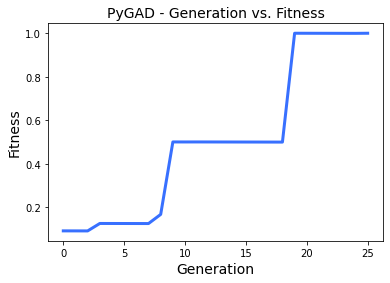

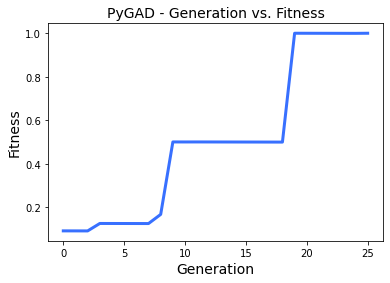

In [ ]:
import pygad
import numpy

function_inputs = [
                        range(1,10),range(1,10),range(1,10),range(1,10),range(1,10),
                        range(10,14),range(10,14),range(10,14),range(10,14)
                        ]
desired_output = 32 # Function output.

numeros={}
def convert_to_symbol(x):
    if x==10:
        return '*'
    elif x==11:
        return '+'
    elif x==12:
        return '-'
    else:
        return '/'
def check_solution(solution):
    tam=len(set(solution))
    if tam!=9:
        return tam-9
    n1=solution[0]
    n2=solution[1]
    n3=solution[2]
    n4=solution[3]
    n5=solution[4]
    s1=convert_to_symbol(solution[5])
    s2=convert_to_symbol(solution[6])
    s3=convert_to_symbol(solution[7])
    s4=convert_to_symbol(solution[8])
    if len(set([n1,n2,n3,n4,n5]))!=5:
        return -1 #devuelve menos uno en caso que algun numero sea repetido
    print(str(n1)+s1+str(n2)+s2+str(n3)+s3+str(n4)+s4+str(n5))
    return eval(str(n1)+s1+str(n2)+s2+str(n3)+s3+str(n4)+s4+str(n5))
def fitness_func(solution, solution_idx):
    tam=len(set(solution))
    if tam!=9:
        return tam-9
    s1=convert_to_symbol(solution[5])
    s2=convert_to_symbol(solution[6])
    s3=convert_to_symbol(solution[7])
    s4=convert_to_symbol(solution[8])
    
    n1=solution[0]
    n2=solution[1]
    n3=solution[2]
    n4=solution[3]
    n5=solution[4]
    output = eval(str(n1)+s1+str(n2)+s2+str(n3)+s3+str(n4)+s4+str(n5))
    if output-int(output)!=0:
      return -1
    if output not in numeros:
        numeros[output]=0
    elif output!=desired_output:
        numeros[output]+=0.0001
    fitness = 1.0 / (numpy.abs(output - desired_output))
    
    return fitness-numeros[output]

ga_instance = pygad.GA(num_generations=100,
                       sol_per_pop=20,
                       num_genes=len(function_inputs),
                       num_parents_mating=10,
                       fitness_func=fitness_func,
                       gene_type=int,
                       gene_space=function_inputs
                       )

ga_instance.run()

#ga_instance.plot_result()
print("Solucion ",ga_instance.best_solution()[0])
print(check_solution(ga_instance.best_solution()[0]))

ga_instance.plot_result()

<h3>Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios</h3>

<h4>Respuesta</h4>
El conjunto de datos aleatorio propuesto serán número 100 aleatorios entre -80 al 80. Se incluye valores, fuera de los amximos y minimo, para incluir la detección de aquellos que no tienen solución.


In [ ]:
import numpy as np
conjunto_datos=np.random.randint(-80,80,100)
conjunto_datos

array([-47, -37,   0, -24,  39, -13, -37, -67, -16, -73,  13,  32,  45,
       -35,  71,  43,  26, -52, -31,  69,  71, -32,  55, -16,  47,  19,
        73,  30, -45, -59,  22,  59,  42, -76,  66, -15, -79,  41,  -6,
        70, -40,  66,  13,  56, -40,  49, -48, -20, -13, -54, -58, -51,
       -12, -38, -48,   4,  -5,  62,  31,   6, -14,  69,  17,  -6,   6,
        12,  23, -22, -54, -35, -16,  21,  -2, -19,  35,  46,  68,  49,
        61, -35,  -6, -51, -15,  22, -66, -68,  74,  41, -13, -74,  10,
       -49,  26,  57,  75, -34,  37,  49, -50, -74])

Aplica el algoritmo al juego de datos generado

Respuesta

In [ ]:
for i in conjunto_datos:
    s=f(i)
    print(s)

5/1+2-9*6
8/2+1-7*6
8/2+1-5*1
6/2+1-7*4
5*7+8-4/1
8/2+1-9*2
8/2+1-7*6
8/2+1-9*8
6/2+1-5*4
No existe solucion
5*2+6-3/1
5*6+4-2/1
5*9+2-6/3
3/1+2-8*5
8*8+9-2/1
5*8+9-6/1
5*5+3-2/1
6/2+1-7*8
6/2+1-5*7
7*9+8-2/1
8*8+9-2/1
6/2+1-9*4
7*7+8-2/1
6/2+1-5*4
5*9+4-2/1
5*3+8-4/1
9*8+3-2/1
5*6+2-8/4
6/2+1-7*7
6/2+1-7*9
5*4+6-8/2
7*8+9-6/1
5*8+4-2/1
No existe solucion
7*9+8-5/1
4/1+2-7*3
No existe solucion
5*8+3-2/1
6/2+1-5*2
8*8+9-3/1
8/2+1-9*5
7*9+8-5/1
5*2+6-3/1
7*8+2-6/3
8/2+1-9*5
5*9+8-4/1
4/1+2-9*6
5/1+2-9*3
8/2+1-9*2
4/1+2-5*12
8/2+1-7*9
6/2+1-5*11
4/1+2-9*2
6/2+1-7*6
4/1+2-9*6
4*1+2-6/3
6/2+1-9*1
7*8+9-3/1
5*6+3-2/1
5*1+3-4/2
6/2+1-9*2
7*9+8-2/1
5*3+4-2/1
6/2+1-5*2
5*1+3-4/2
5*2+4-6/3
5*4+9-6/1
4/1+2-7*4
4/1+2-5*12
3/1+2-8*5
6/2+1-5*4
5*4+3-2/1
8/2+1-7*1
6/1+2-9*3
5*7+2-6/3
5*9+3-2/1
7*9+8-3/1
5*9+8-4/1
7*8+9-4/1
3/1+2-8*5
6/2+1-5*2
6/2+1-5*11
4/1+2-7*3
5*4+6-8/2
6/2+1-5*14
6/2+1-9*8
9*8+4-2/1
5*8+3-2/1
8/2+1-9*2
No existe solucion
7*1+5-4/2
8/2+1-9*6
5*5+3-2/1
7*8+3-2/1
9*8+5-2/1
4/1+2-8*5


<h3>Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo</h3>

<h4>Respuesta</h4>
1. Gad, A. F. (2021). PyGAD: An Intuitive Genetic Algorithm Python Library. 


<h3>Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño</h3>

<h4>Respuesta</h4>
Dado que el problema se basa en operaciones diferentes, solo se podria expandir el intervalo de numero a todos los reales, en ese caso, se podria seguir la solución propuesta en la función f(n), la cual podria adaptarse para conseguir soluciones en intervalos mayores. Sin embargo, este algoritmo, solo permitiria como máximo hallar 8 soluciones. Para hallar las demás soluciones se debe explorar los otros tipos de combinaciones de los operadores, para encontrar diferentes formas en que se pueda aplicar la multiplación para encontrarlos valores restantes. 